<a href="https://colab.research.google.com/github/manluz555-ops/Line_progr/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Programming
**Домашня робота №2**

Манзар Л.В

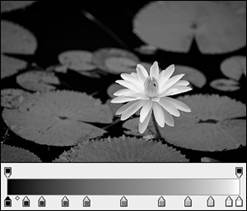

Saving flower.jpg to flower (2).jpg


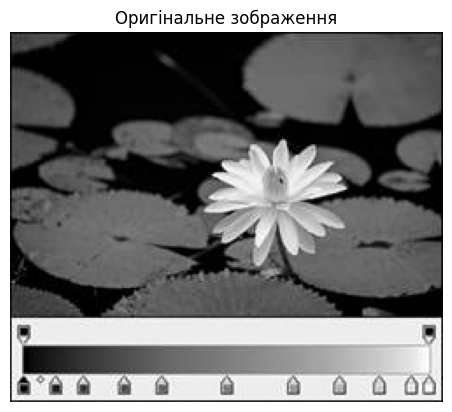

Розмір: (211, 247)


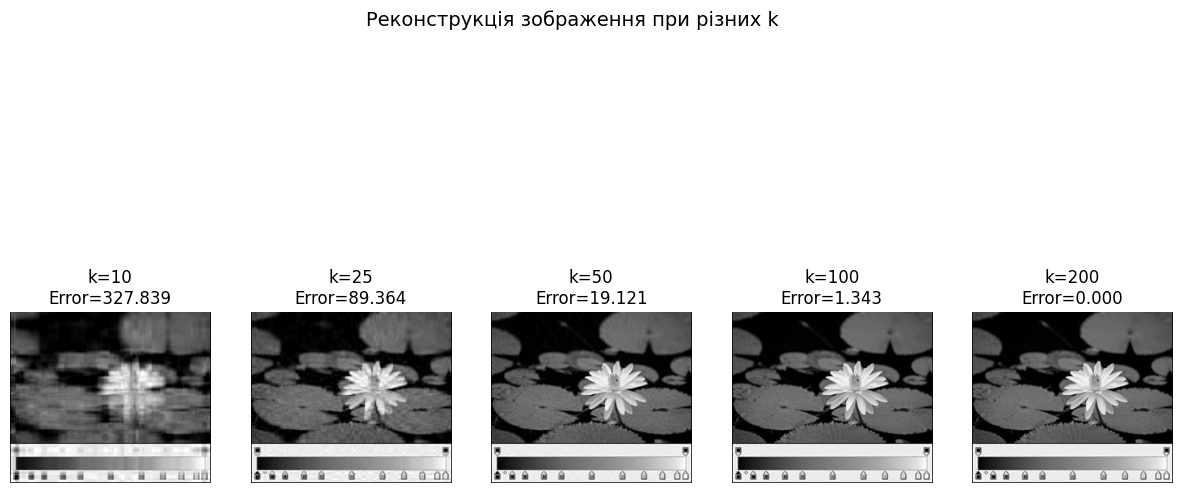

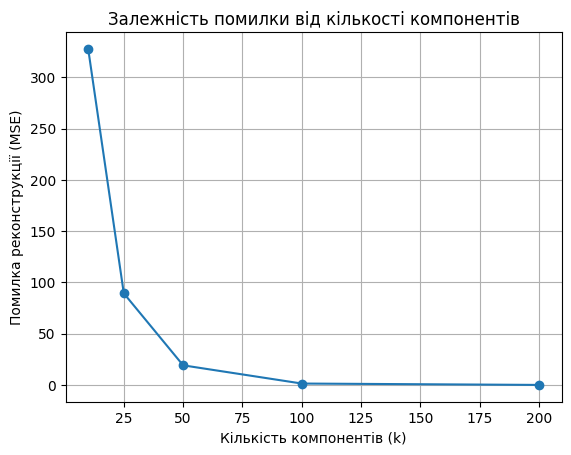

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import TruncatedSVD
from google.colab import files

# 1. Завантаження зображення
uploaded = files.upload()
image = mpimg.imread("flower.jpg")

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title("Оригінальне зображення")
plt.show()

# 2. Розмір
print("Розмір:", image.shape)
if len(image.shape) == 3:
    height, width, channels = image.shape
else:
    height, width = image.shape
    channels = 1

# 3. Перетворення у 2D
flat_image = image.reshape(-1, width * channels)

# 4. Експерименти з різними k
ks = [10, 25, 50, 100, 200]
plt.figure(figsize=(15, 8))

for i, k in enumerate(ks, 1):
    svd = TruncatedSVD(n_components=k)
    truncated = svd.fit_transform(flat_image)
    reconstructed = svd.inverse_transform(truncated)
    error = np.mean((reconstructed - flat_image)**2)

    reconstructed = reconstructed.reshape(height, width, channels)
    reconstructed = np.clip(reconstructed, 0, 255).astype("uint8")

    plt.subplot(1, len(ks), i)
    plt.imshow(reconstructed, cmap="gray")
    plt.axis("off")
    plt.title(f"k={k}\nError={error:.3f}")

plt.suptitle("Реконструкція зображення при різних k", fontsize=14)
plt.show()

# 5. Графік залежності помилки від k
errors = []
for k in ks:
    svd = TruncatedSVD(n_components=k)
    truncated = svd.fit_transform(flat_image)
    reconstructed = svd.inverse_transform(truncated)
    error = np.mean((reconstructed - flat_image)**2)
    errors.append(error)

plt.plot(ks, errors, marker="o")
plt.xlabel("Кількість компонентів (k)")
plt.ylabel("Помилка реконструкції (MSE)")
plt.title("Залежність помилки від кількості компонентів")
plt.grid(True)
plt.show()

# Висновки

При малих значеннях k (10–25) картинка сильно розмита, втрата якості очевидна.

При середніх значеннях k (50–100) картинка впізнавана, але трохи менш чітка.

При великих значеннях k (200+) якість майже як у оригіналу, помилка реконструкції дуже мала.

Висновок: помітна втрата якості зображення спостерігається при малих значеннях k (до ~25).